## 2023 06/16 REMBG

*Last Updated*: 2023-09-12

### Authors
* Hannah Zhang (hannahzhang@ucsb.edu)


### Overview
This Jupyter notebook is intended to demonstrate

* AutoML experiments on cropped palms from 11khands dataset generated using Mediapipe


### Key Results

- Huber regressor, Random Forest, and Linear Regression perform the best
- Dummy Regressor 5th best
- 11khands images are blurry -> could affect glcm features

In [ ]:
# --- Imports

# External packages
from pycaret import regression
from pycaret.datasets import get_data
import os
import cv2
from dermaml import data
from dermaml import features
import PIL
from PIL import Image
import numpy as np
import mlflow
import matplotlib.pyplot as plt
import pandas as pd
import skimage


In [2]:
# Dataset
dataset_name = "11khands"

# AutoML
experiment_name = "11khands-automl-sample-test"
num_best_models = 5
random_seed = 123  # seed used for random number generators to ensure reproducibility of results in this notebook

In [3]:
def load_image_paths(folder_path):
    image_paths = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')):
                # Create the full path to the image file
                image_path = os.path.join(root, file)
                image_paths.append(image_path)
    return image_paths

# Example usage:
image_folder = '/Users/hannahzhang/Downloads/11khands_test_ims_2/'
image_paths = load_image_paths(image_folder)

# Print the list of image paths
print(image_paths)


['/Users/hannahzhang/Downloads/11khands_test_ims_2/Hand_0000003.jpg', '/Users/hannahzhang/Downloads/11khands_test_ims_2/Hand_0000002.jpg', '/Users/hannahzhang/Downloads/11khands_test_ims_2/Hand_0003093.jpg', '/Users/hannahzhang/Downloads/11khands_test_ims_2/Hand_0009409.jpg', '/Users/hannahzhang/Downloads/11khands_test_ims_2/Hand_0001045.jpg', '/Users/hannahzhang/Downloads/11khands_test_ims_2/Hand_0003097.jpg', '/Users/hannahzhang/Downloads/11khands_test_ims_2/Hand_0000005.jpg', '/Users/hannahzhang/Downloads/11khands_test_ims_2/Hand_0000004.jpg', '/Users/hannahzhang/Downloads/11khands_test_ims_2/Hand_0003096.jpg', '/Users/hannahzhang/Downloads/11khands_test_ims_2/Hand_0001046.jpg', '/Users/hannahzhang/Downloads/11khands_test_ims_2/Hand_0003094.jpg', '/Users/hannahzhang/Downloads/11khands_test_ims_2/Hand_0000006.jpg', '/Users/hannahzhang/Downloads/11khands_test_ims_2/Hand_0003095.jpg', '/Users/hannahzhang/Downloads/11khands_test_ims_2/Hand_0001047.jpg', '/Users/hannahzhang/Downloads/11k

In [37]:
cropped_ims = []
cropped_filenames = []

for path in image_paths:
    output = data.crop_palm(path)
    if output is not None:
        cropped_ims.append(output)
        filename = os.path.basename(path)
        cropped_filenames.append(filename)


No hands detected in the image.
No hands detected in the image.
No hands detected in the image.
No hands detected in the image.
No hands detected in the image.
No hands detected in the image.
No hands detected in the image.
No hands detected in the image.
No hands detected in the image.
No hands detected in the image.
No hands detected in the image.
No hands detected in the image.
No hands detected in the image.
No hands detected in the image.
No hands detected in the image.
No hands detected in the image.


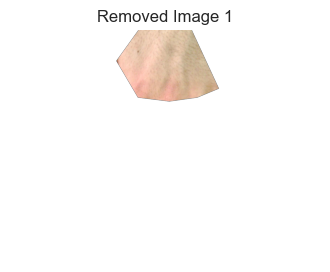

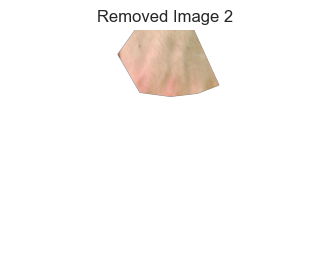

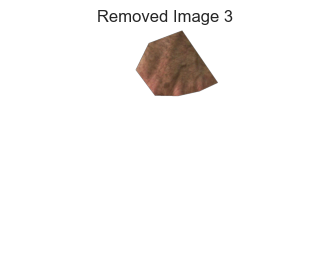

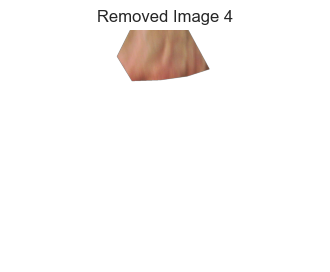

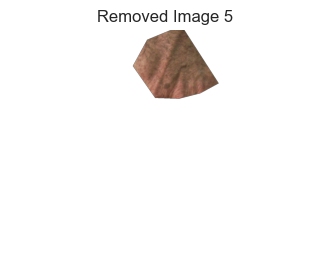

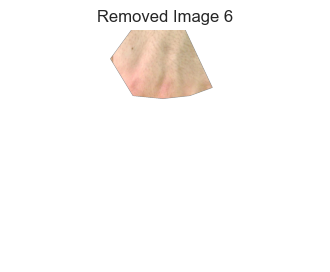

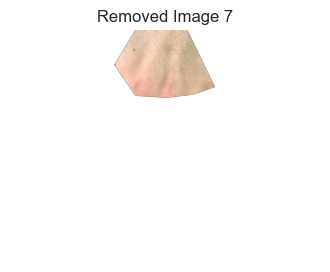

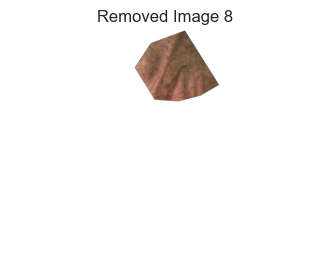

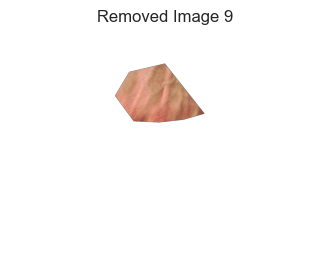

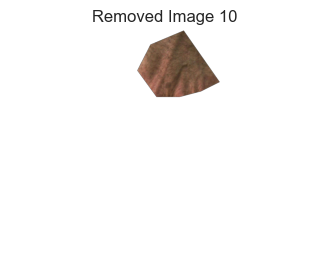

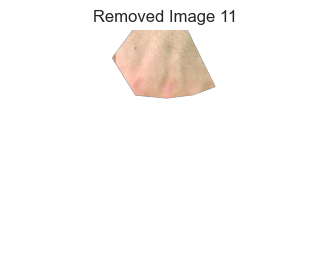

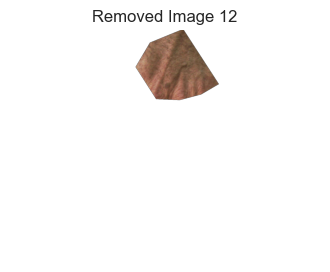

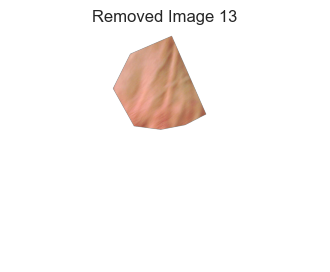

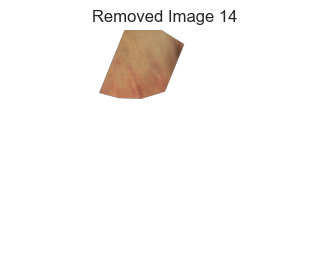

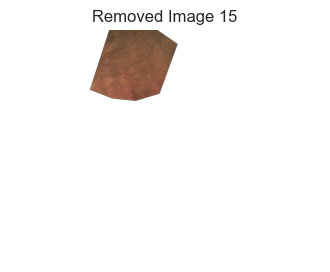

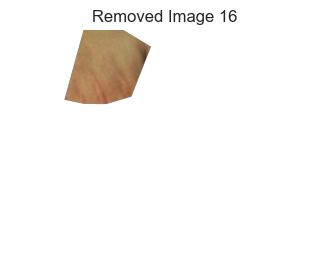

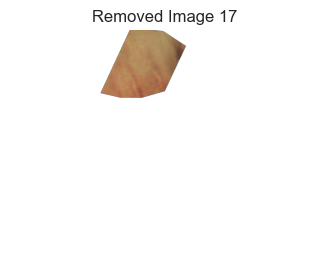

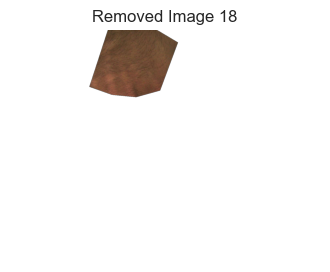

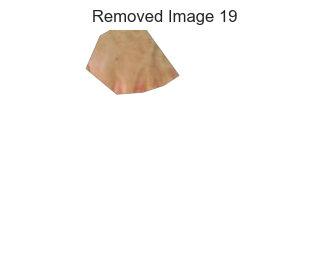

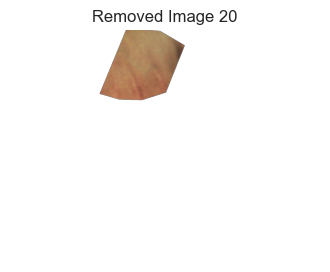

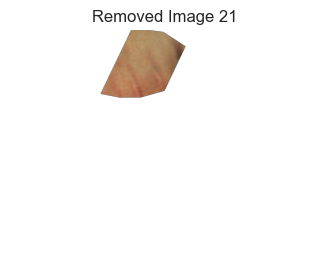

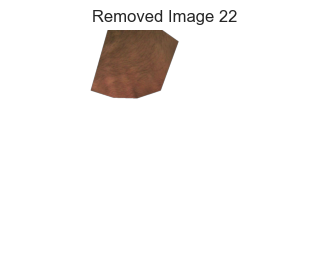

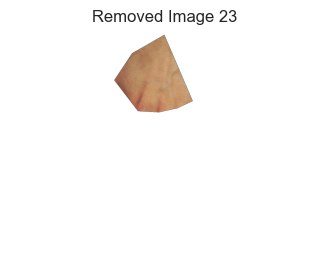

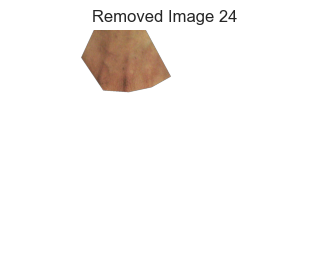

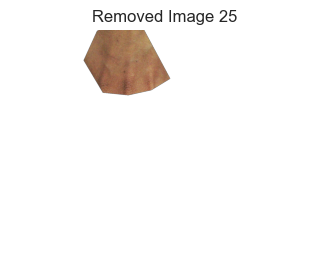

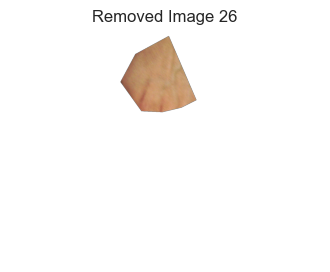

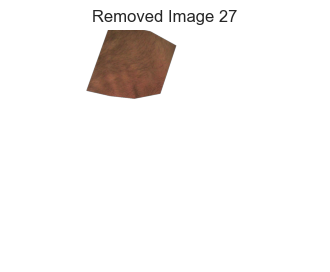

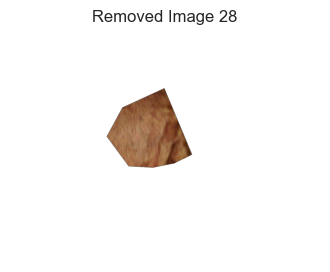

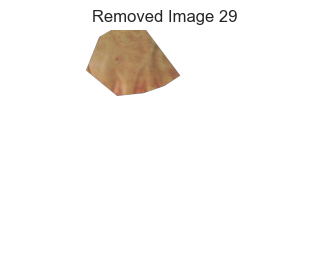

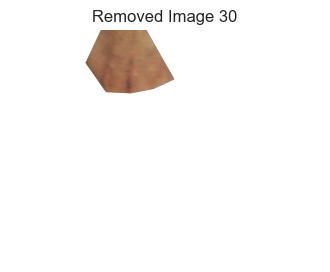

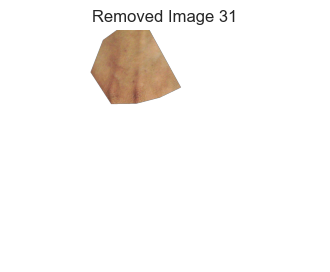

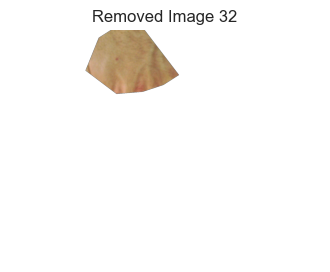

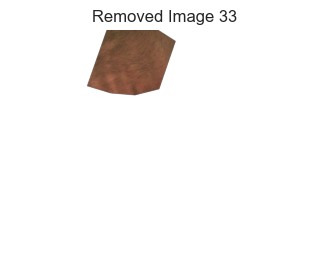

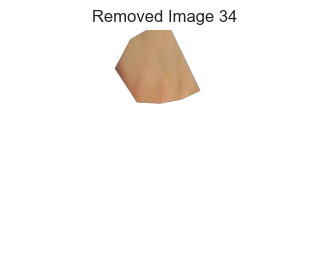

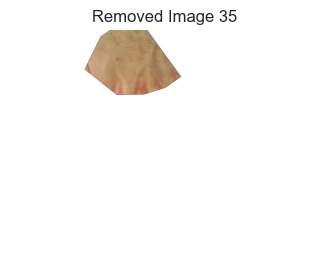

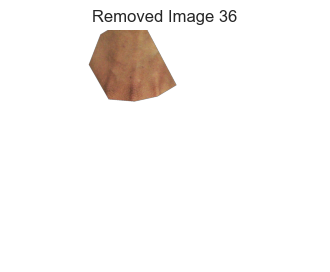

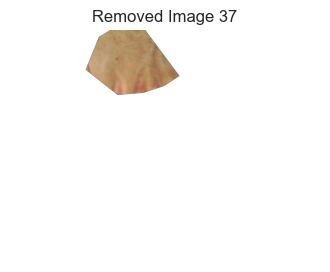

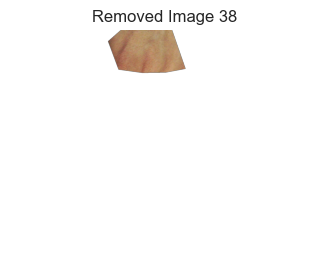

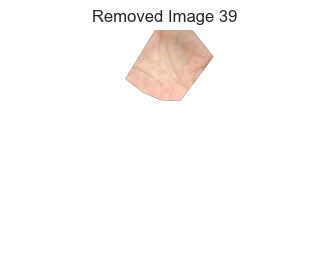

In [38]:
import matplotlib.pyplot as plt

# Assuming removed_ims contains a list of BGRA images
for i, im in enumerate(cropped_ims):
    # Convert BGRA image to RBGA
    # grayscale_im = cv2.cvtColor(im, cv2.COLOR_BGRA2RGBA)

    plt.figure(figsize=(4, 4))
    plt.imshow(im, cmap='gray') 
    plt.title(f'Removed Image {i + 1}')
    plt.axis('off')
    plt.show()


Load in CSV File

In [39]:
csv_file = '/Users/hannahzhang/Downloads/handinfocropped.csv'

# Read the CSV file
df = pd.read_csv(csv_file)

In [40]:
print(f"Columns: {list(df.columns)}")

Columns: ['age', 'imageName']


In [41]:
print(df)

    age         imageName
0    27  Hand_0000002.jpg
1    27  Hand_0000003.jpg
2    27  Hand_0000004.jpg
3    27  Hand_0000005.jpg
4    27  Hand_0000006.jpg
5    20  Hand_0000080.jpg
6    20  Hand_0000081.jpg
7    20  Hand_0000082.jpg
8    20  Hand_0000083.jpg
9    20  Hand_0000084.jpg
10   21  Hand_0000132.jpg
11   21  Hand_0000133.jpg
12   21  Hand_0000134.jpg
13   21  Hand_0000135.jpg
14   21  Hand_0000140.jpg
15   26  Hand_0000876.jpg
16   26  Hand_0000877.jpg
17   26  Hand_0000878.jpg
18   26  Hand_0000879.jpg
19   26  Hand_0000880.jpg
20   30  Hand_0001012.jpg
21   30  Hand_0001013.jpg
22   30  Hand_0001014.jpg
23   30  Hand_0001015.jpg
24   30  Hand_0001016.jpg
25   29  Hand_0001045.jpg
26   29  Hand_0001046.jpg
27   29  Hand_0001047.jpg
28   29  Hand_0001048.jpg
29   29  Hand_0001049.jpg
30   43  Hand_0001757.jpg
31   43  Hand_0001758.jpg
32   43  Hand_0001759.jpg
33   43  Hand_0001760.jpg
34   43  Hand_0001761.jpg
35   36  Hand_0001803.jpg
36   36  Hand_0001804.jpg
37   36  Han

GLCM Extraction

In [42]:
glcm_features = []

for im, pathname in zip(cropped_ims, cropped_filenames):
    contrast, correlation, energy, homogeneity = features.compute_glcm(im)

    # Append the GLCM features for each image along with the file name
    glcm_features.append({
        'Filename': pathname,
        'Contrast': contrast[0, 0],
        'Correlation': correlation[0, 0],
        'Energy': energy[0, 0],
        'Homogeneity': homogeneity[0, 0]
    })

In [44]:
print(glcm_features)

[{'Filename': 'Hand_0000003.jpg', 'Contrast': 66.79068025078371, 'Correlation': 0.9861365700981195, 'Energy': 0.9231234110563284, 'Homogeneity': 0.9384059347451559}, {'Filename': 'Hand_0000002.jpg', 'Contrast': 55.01221525600837, 'Correlation': 0.9864893173467477, 'Energy': 0.9273113193113756, 'Homogeneity': 0.9442058517201735}, {'Filename': 'Hand_0003093.jpg', 'Contrast': 19.45744723092999, 'Correlation': 0.9713872638120404, 'Energy': 0.9516143439166646, 'Homogeneity': 0.9585366595621124}, {'Filename': 'Hand_0001045.jpg', 'Contrast': 23.290428422152562, 'Correlation': 0.9855335718730468, 'Energy': 0.947377924986148, 'Homogeneity': 0.9583131651558597}, {'Filename': 'Hand_0003097.jpg', 'Contrast': 25.66449216300941, 'Correlation': 0.9740031722938789, 'Energy': 0.9446122135659539, 'Homogeneity': 0.951740842461082}, {'Filename': 'Hand_0000005.jpg', 'Contrast': 66.34868338557993, 'Correlation': 0.9855263426718477, 'Energy': 0.9259360072527711, 'Homogeneity': 0.9403378203843309}, {'Filename

In [45]:
glcm_df = pd.DataFrame(glcm_features)
print(f"Columns: {list(glcm_df.columns)}")

Columns: ['Filename', 'Contrast', 'Correlation', 'Energy', 'Homogeneity']


In [46]:
# Set the image filenames as the index in the new GLCM DataFrame
glcm_df.set_index('Filename', inplace=True)

In [47]:
# Merging DataFrames with different column names
merged_data = df.merge(glcm_df, left_on='imageName', right_on='Filename', how='inner')

# Save the merged DataFrame back to the CSV file
merged_data.to_csv(csv_file, index=False)

In [48]:
print(f"Columns: {list(merged_data.columns)}")

Columns: ['age', 'imageName', 'Contrast', 'Correlation', 'Energy', 'Homogeneity']


In [49]:
merged_data.drop(columns=['imageName'], inplace=True)

In [50]:
print(f"Columns: {list(merged_data.columns)}")

Columns: ['age', 'Contrast', 'Correlation', 'Energy', 'Homogeneity']


In [52]:
print(merged_data)

    age   Contrast  Correlation    Energy  Homogeneity
0    27  55.012215     0.986489  0.927311     0.944206
1    27  66.790680     0.986137  0.923123     0.938406
2    27  66.759200     0.985264  0.927860     0.942228
3    27  66.348683     0.985526  0.925936     0.940338
4    27  64.856856     0.985866  0.925785     0.940776
5    20  39.894925     0.980702  0.932944     0.941963
6    20  24.786839     0.981248  0.941661     0.951424
7    20  26.661435     0.980425  0.941080     0.948988
8    20  28.653712     0.978106  0.940867     0.947214
9    20  30.372303     0.978489  0.935525     0.942949
10   21  19.487191     0.984016  0.960942     0.966814
11   21  36.462993     0.984026  0.938506     0.957692
12   21  33.284790     0.981363  0.948785     0.960298
13   21  34.036054     0.980262  0.947413     0.957844
14   21  65.470481     0.982544  0.941037     0.954130
15   26  13.839587     0.981770  0.937172     0.948514
16   26  14.025377     0.981500  0.934639     0.946149
17   26  1

AutoML Regression

In [53]:
# --- Perform AutoML Evaluation

# Set up the dataset for AutoML regression
regression.setup(data=merged_data,
                 target="age",
                 log_experiment=True,
                 experiment_name=experiment_name,
                 session_id=random_seed,
                ) 

# Automatically train, test, and evaluate models
best_models = regression.compare_models(n_select=num_best_models, verbose=False)

,Description,Value
0,Session id,123
1,Target,age
2,Target type,Regression
3,Original data shape,"(39, 5)"
4,Transformed data shape,"(39, 5)"
5,Transformed train set shape,"(27, 5)"
6,Transformed test set shape,"(12, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


Traceback (most recent call last):
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 304, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 397, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 1306, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 1299, in _read_helper
    result = read_yaml(root, file_name)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/utils/file_utils.py", line 282, in read_yaml
    raise MissingConfigException(f"Yaml file '{file_path}' does not exist.")
mlflow.e

In [54]:
for model in best_models:
    print(model)
    print()

HuberRegressor()

RandomForestRegressor(n_jobs=-1, random_state=123)

LinearRegression(n_jobs=-1)

Lars(random_state=123)

DummyRegressor()



In [55]:
# Display score table
regression.pull()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,8.3686,130.9718,10.3414,-2.3533,0.2783,0.2515,0.015
rf,Random Forest Regressor,5.5862,136.5707,8.2181,-3.5438,0.2311,0.1875,0.026
lr,Linear Regression,8.4103,161.4327,10.5810,-3.5936,0.3025,0.2706,0.171
lar,Least Angle Regression,8.4702,162.0075,10.6026,-3.6003,0.3030,0.2721,0.014
dummy,Dummy Regressor,9.9607,152.1527,11.5974,-4.5644,0.3148,0.3010,0.016
lightgbm,Light Gradient Boosting Machine,9.9607,152.1527,11.5974,-4.5644,0.3148,0.3010,0.019
br,Bayesian Ridge,9.7473,151.6687,11.5065,-4.8161,0.3116,0.2982,0.014
et,Extra Trees Regressor,5.4027,136.4505,8.1158,-4.8271,0.2299,0.1850,0.025
lasso,Lasso Regression,9.0915,146.3938,11.0833,-5.2864,0.2959,0.2772,0.015
llar,Lasso Least Angle Regression,9.0915,146.3938,11.0833,-5.2864,0.2959,0.2772,0.015


In [56]:
# --- Huber Regressor

huber_model = regression.create_model('huber')
huber_model_tuned = regression.tune_model(huber_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,10.4287,125.0067,11.1806,-0.3174,0.3749,0.4242
1,12.9809,465.0078,21.5640,-0.3561,0.4306,0.1941
2,8.8628,88.9723,9.4325,-0.6210,0.2669,0.2916
3,9.0955,134.9299,11.6159,-0.0980,0.2657,0.1837
4,9.4452,143.7408,11.9892,-0.7067,0.3789,0.3726
5,8.6356,102.4294,10.1207,-9.7194,0.3530,0.3874
6,6.9774,89.9218,9.4827,-0.2489,0.2107,0.1454
7,5.2418,30.9295,5.5614,-12.7464,0.1858,0.1949
8,10.9386,127.3868,11.2866,0.3501,0.2764,0.2839


Traceback (most recent call last):
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 304, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 397, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 1306, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 1299, in _read_helper
    result = read_yaml(root, file_name)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/utils/file_utils.py", line 282, in read_yaml
    raise MissingConfigException(f"Yaml file '{file_path}' does not exist.")
mlflow.e

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.6046,92.9940,9.6433,0.0200,0.2987,0.2477
1,20.3872,695.3597,26.3697,-1.0279,0.5998,0.3928
2,5.0983,69.5199,8.3379,-0.2666,0.2303,0.1226
3,15.9744,335.7057,18.3223,-1.7318,0.4775,0.3533
4,12.1216,152.2635,12.3395,-0.8079,0.3868,0.3928
5,5.5316,45.4560,6.7421,-3.7570,0.2483,0.2452
6,15.9026,326.0599,18.0571,-3.5286,0.4828,0.3553
7,2.2218,8.1991,2.8634,-2.6441,0.0904,0.0774
8,14.6206,390.5706,19.7629,-0.9927,0.5025,0.2839


Fitting 10 folds for each of 10 candidates, totalling 100 fits


Traceback (most recent call last):
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 304, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 397, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 1306, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 1299, in _read_helper
    result = read_yaml(root, file_name)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/utils/file_utils.py", line 282, in read_yaml
    raise MissingConfigException(f"Yaml file '{file_path}' does not exist.")
mlflow.e

In [57]:
# --- Random Forest Regressor
rf_model = regression.create_model('rf')
rf_model_tuned = regression.tune_model(rf_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.8033,119.0855,10.9126,-0.2550,0.3690,0.3527
1,16.1033,714.7267,26.7344,-1.0844,0.6091,0.2412
2,3.2367,19.2980,4.3930,0.6484,0.1292,0.1025
3,1.1767,1.8430,1.3576,0.9850,0.0316,0.0275
4,8.4367,129.6088,11.3846,-0.5389,0.3673,0.3552
5,11.9433,357.6198,18.9108,-36.4253,0.5445,0.5847
6,3.2567,15.4492,3.9306,0.7854,0.1140,0.0858
7,1.7750,5.5377,2.3532,-1.4612,0.0826,0.0617
8,0.8700,0.7570,0.8701,0.9961,0.0260,0.0249


Traceback (most recent call last):
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 304, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 397, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 1306, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 1299, in _read_helper
    result = read_yaml(root, file_name)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/utils/file_utils.py", line 282, in read_yaml
    raise MissingConfigException(f"Yaml file '{file_path}' does not exist.")
mlflow.e

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.6909,202.9447,14.2459,-1.1388,0.4487,0.4271
1,13.8424,489.9515,22.1348,-0.4289,0.4480,0.2142
2,6.6136,93.2381,9.6560,-0.6987,0.2565,0.2191
3,6.7652,80.3679,8.9648,0.3460,0.1933,0.1367
4,9.3909,136.1658,11.6690,-0.6167,0.3718,0.3819
5,5.2818,41.8487,6.4691,-3.3795,0.2370,0.2334
6,8.0864,84.1356,9.1725,-0.1685,0.2218,0.1839
7,1.6773,3.3689,1.8355,-0.4973,0.0639,0.0597
8,8.2909,127.4705,11.2903,0.3496,0.2432,0.1598


Fitting 10 folds for each of 10 candidates, totalling 100 fits


Traceback (most recent call last):
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 304, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 397, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 1306, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/store/tracking/file_store.py", line 1299, in _read_helper
    result = read_yaml(root, file_name)
  File "/Applications/DermaML/.venv/lib/python3.10/site-packages/mlflow/utils/file_utils.py", line 282, in read_yaml
    raise MissingConfigException(f"Yaml file '{file_path}' does not exist.")
mlflow.e